In [1]:
import sys
import os
import numpy as np
sys.path.insert(0, r'D:\uni\Masterarbeit\Code\auswertung')
import auswertung_ma
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special
from auswertung_ma import f_exp, f_poly, f_poly_long

In [41]:
data = {}
p_zic = r"D:\Uni\Masterarbeit\Daten\ZIC\1_scenario"
for ho in os.listdir(p_zic):
#     print(ho)
    n = int(ho.split("_")[1])
    data[n] = auswertung_ma.Read_HO(os.path.join(p_zic, ho), 'b_beide', -1)

Lese die Daten ein...
fertig!
Lese die Daten ein...
fertig!
Lese die Daten ein...
fertig!
Lese die Daten ein...
fertig!
Lese die Daten ein...
fertig!
Lese die Daten ein...
fertig!


In [24]:
data[10].id_values

[0.0, 0.5, 1.0, 1.5, 10.0, 4.0, 5.0, 5.1, 5.2, 5.5]

# Anteil ganz geloester Problemstellungen

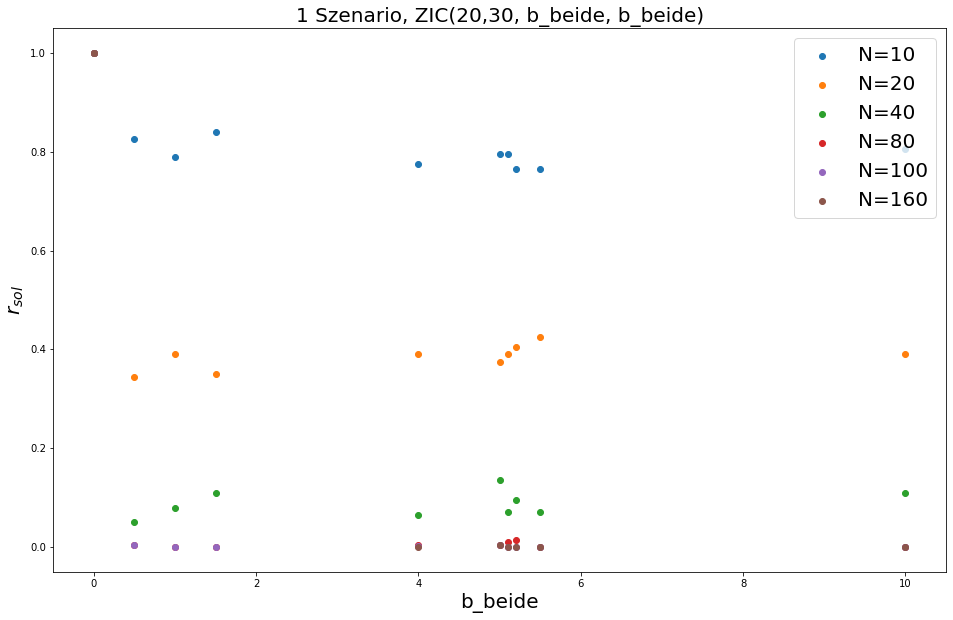

In [42]:
fig, ax = plt.subplots(figsize=(16,10))

for n in sorted(data.keys()):
    ax.scatter(data[n].id_values, data[n].anteil_ganz_geloest, label=f'N={n}')
#     ax.plot(data[n].id_values, data[n].anteil_ganz_geloest, alpha=0.4)
    
ax.set_xlabel('b_beide', fontsize=20)
ax.set_ylabel('$r_{sol}$', fontsize=20)
ax.set_title('1 Szenario, ZIC(20,30, b_beide, b_beide)', fontsize=20)
ax.legend(fontsize=20)

Komisch, bis b_beide=5 erwarte ich eigentlich, dass das Problem einfach ist, weil alle Kanten da noch in der ersten Phase billiger sind, als im Szenario. Es werden auch nur 1. stage Kanten gekauft, aber teilweise nur zu 50%. 

Ich habe ja keinen Tree, d.h. ich habe die Auswahl aus einer größeren Kantenmenge. Es macht scheinbar schon einen Unterschied für den LP-Alg, dass Kantengewichte unterschiedlich sind. Es geht scheinbar nicht allein darum, dass in der ersten Stage alle Kanten billiger sind, als in der 2. Stage, weil das ist für kleine b_beide-Werte gegeben.

Wenn alle Werte gleich sind, sprich alle 1. stage Kosten 20, alle 2. stage Kosten 30, dann wird alles ganzzahlig geloest.

# Anteil ganzzahliger LP-Variablen

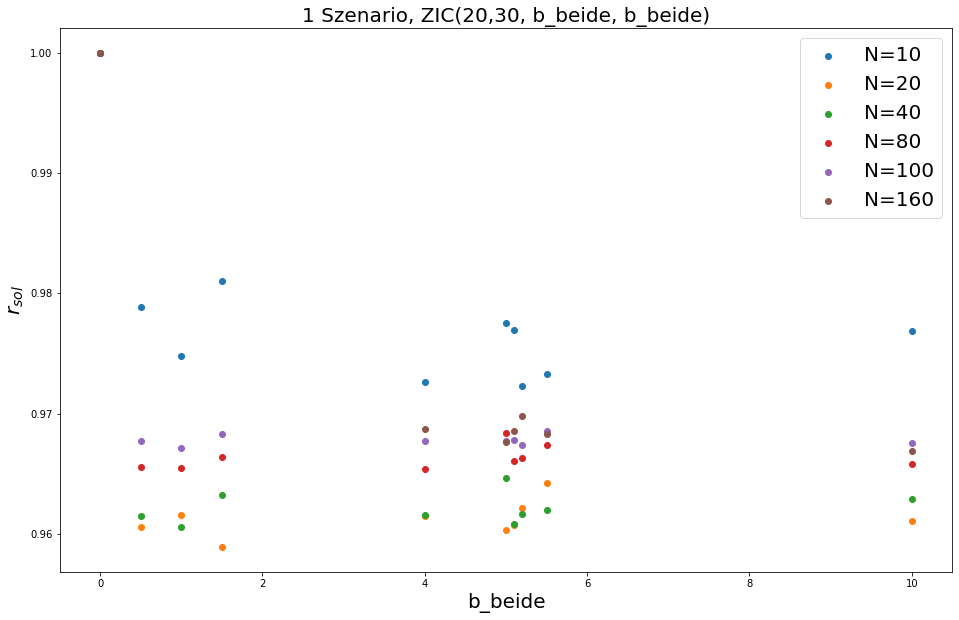

In [43]:
fig, ax = plt.subplots(figsize=(16,10))

for n in sorted(data.keys()):
    ax.scatter(data[n].id_values, data[n].mean_anteil_lp_ganz, label=f'N={n}')
#     ax.plot(data[n].id_values, data[n].anteil_ganz_geloest, alpha=0.4)
    
ax.set_xlabel('b_beide', fontsize=20)
ax.set_ylabel('$r_{sol}$', fontsize=20)
ax.set_title('1 Szenario, ZIC(20,30, b_beide, b_beide)', fontsize=20)
ax.legend(fontsize=20)

#  Anzahl Loopiterationen

Text(0.5, 1.0, 'Loop-Iteration-Skalierung')

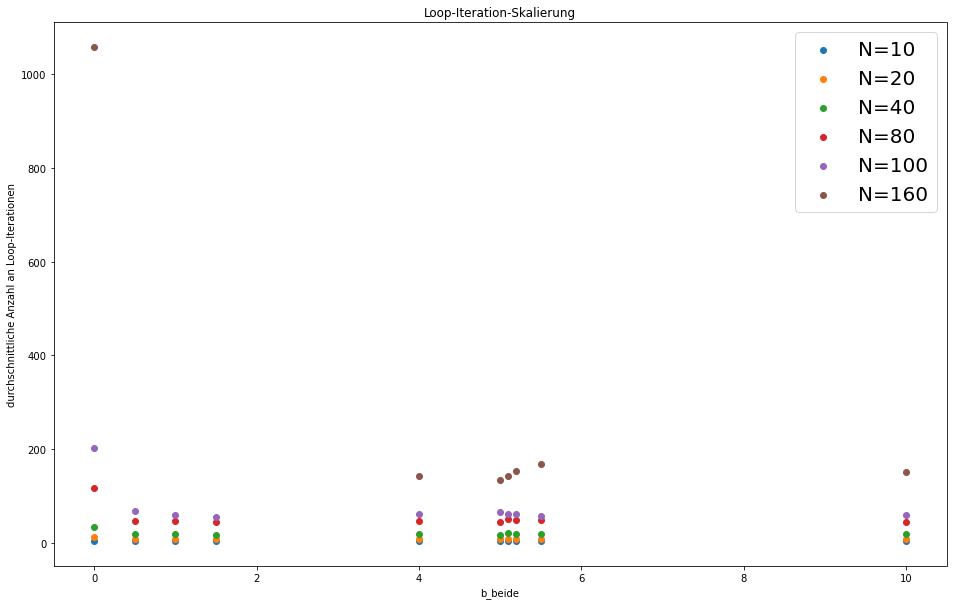

In [44]:
fig, ax = plt.subplots(figsize=(16,10))

for n in sorted(data.keys()):
    ax.scatter(data[n].id_values, data[n].mean_loop_iterations, label=f'N={n}')

ax.legend(fontsize=20)
ax.set_xlabel('b_beide')
ax.set_ylabel('durchschnittliche Anzahl an Loop-Iterationen')
ax.set_title('Loop-Iteration-Skalierung')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim([0,200])

# Algorithmus performance

<AxesSubplot:title={'center':'Knoten mit hpc$'}, ylabel='im Mittel erzielter Erwartungswert'>

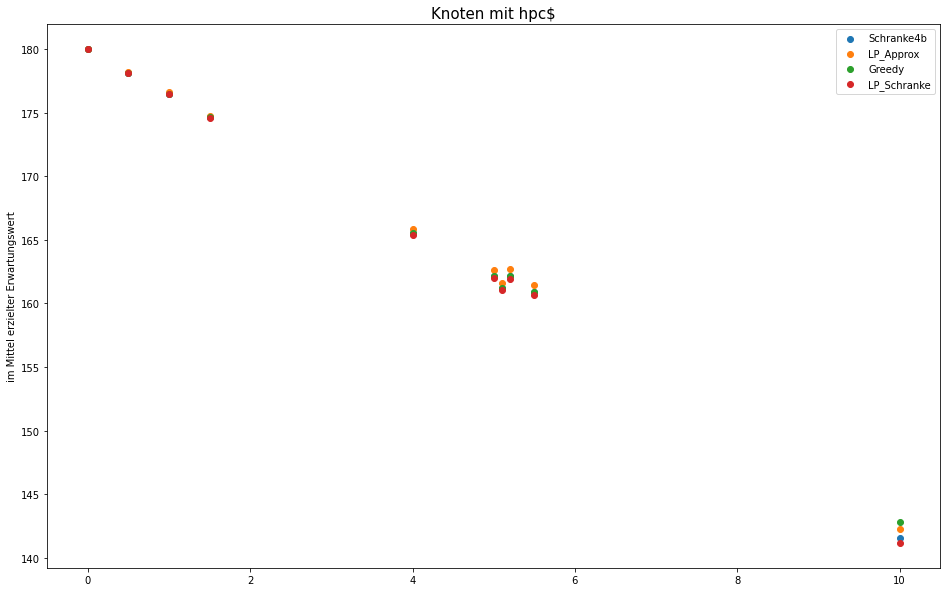

In [45]:
data[10].plot_results()

In [37]:
data[100].m_res['Schranke4b']

{'ids': [0.0, 0.5, 1.0, 1.5, 10.0, 4.0, 5.0, 5.1, 5.2, 5.5],
 'ms': [1980.0,
  1959.0471400750007,
  1937.9824708749998,
  1916.9531929499988,
  1549.1918630849987,
  1812.0229391374983,
  1769.33586859,
  1764.7264551249996,
  1759.2627055999994,
  1744.936835815001]}

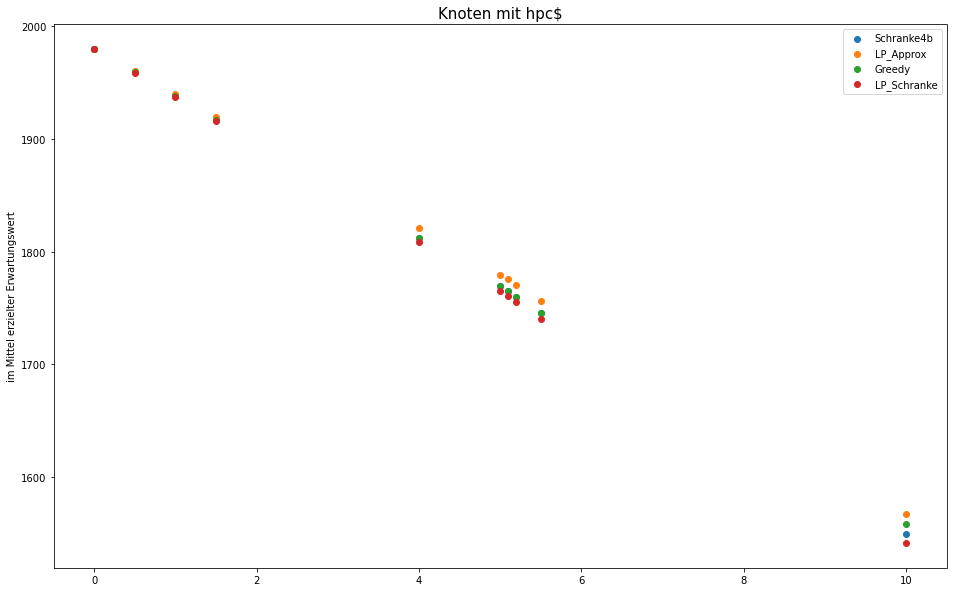

In [38]:
ax = data[100].plot_results()
# ax.set_yscale('log')
# ax.set_ylim([1720,1780])

<AxesSubplot:title={'center':'Knoten mit hpc$'}, ylabel='im Mittel erzielter Erwartungswert'>

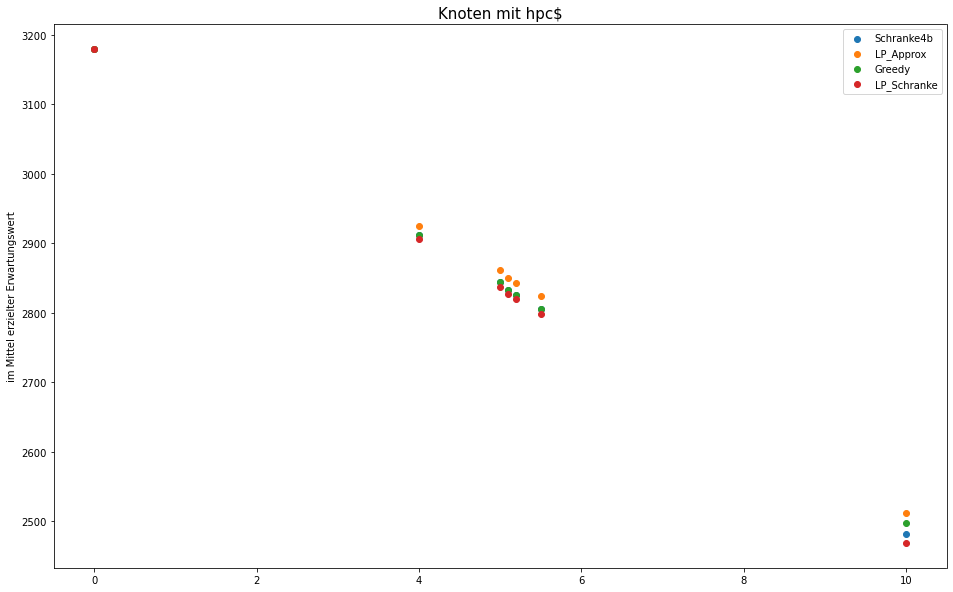

In [46]:
data[160].plot_results()

# Das ganze mit 5 scenarios

In [3]:
data5 = {}
p_zic5 = r"D:\Uni\Masterarbeit\Daten\ZIC\5_scenarios"

no_lp = (640, 1280, 2560)
for ho in os.listdir(p_zic5):
#     print(ho)
    n = int(ho.split("_")[1])
    read_lp = False if n in no_lp else True
    data5[n] = auswertung_ma.Read_HO(os.path.join(p_zic5, ho), 'b_beide', -1, read_lp=False)

Lese die Daten ein...
fertig!
Lese die Daten ein...
fertig!
Lese die Daten ein...
fertig!
Lese die Daten ein...
fertig!
Lese die Daten ein...
fertig!
Lese die Daten ein...
fertig!
Lese die Daten ein...
fertig!
Lese die Daten ein...
fertig!
Lese die Daten ein...
fertig!
Lese die Daten ein...
fertig!
Lese die Daten ein...
fertig!


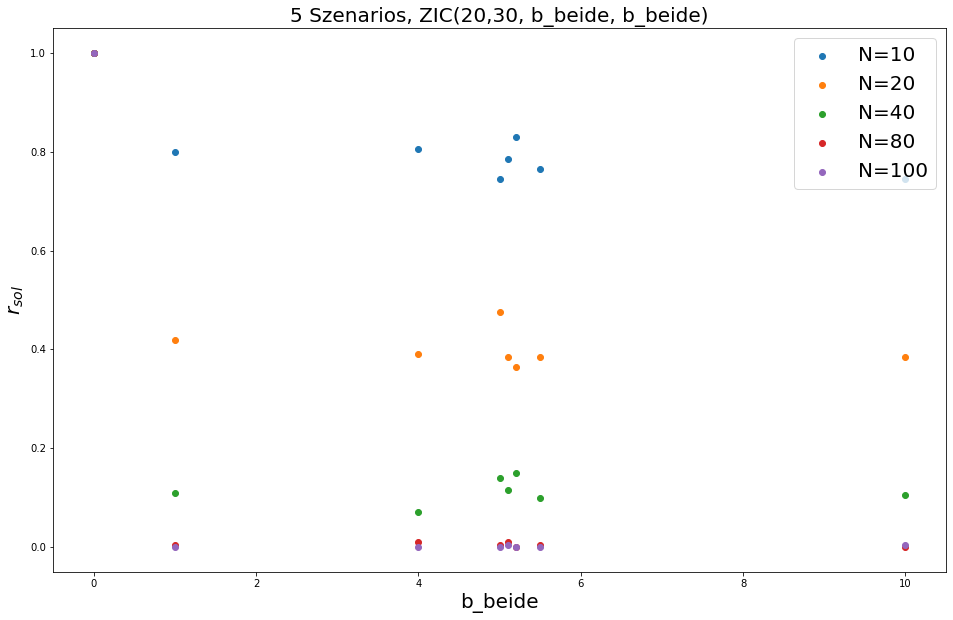

In [5]:
fig, ax = plt.subplots(figsize=(16,10))

for n in sorted(data5.keys()):
    if n not in no_lp:
        ax.scatter(data5[n].id_values, data5[n].anteil_ganz_geloest, label=f'N={n}')
    
ax.set_xlabel('b_beide', fontsize=20)
ax.set_ylabel('$r_{sol}$', fontsize=20)
ax.set_title('5 Szenarios, ZIC(20,30, b_beide, b_beide)', fontsize=20)
ax.legend(fontsize=20)

<AxesSubplot:title={'center':'Knoten mit hpc$'}, ylabel='im Mittel erzielter Erwartungswert'>

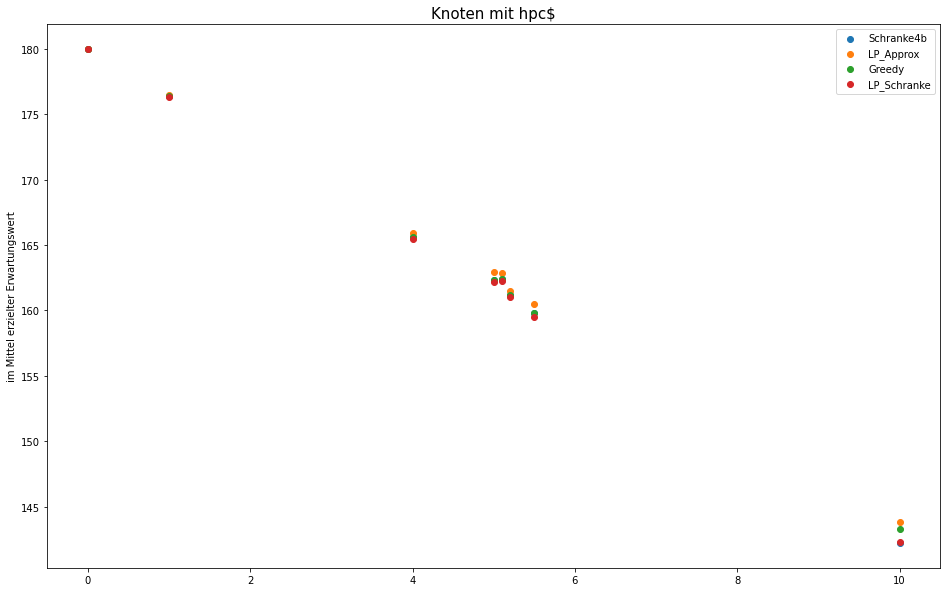

In [4]:
data5[10].plot_results()

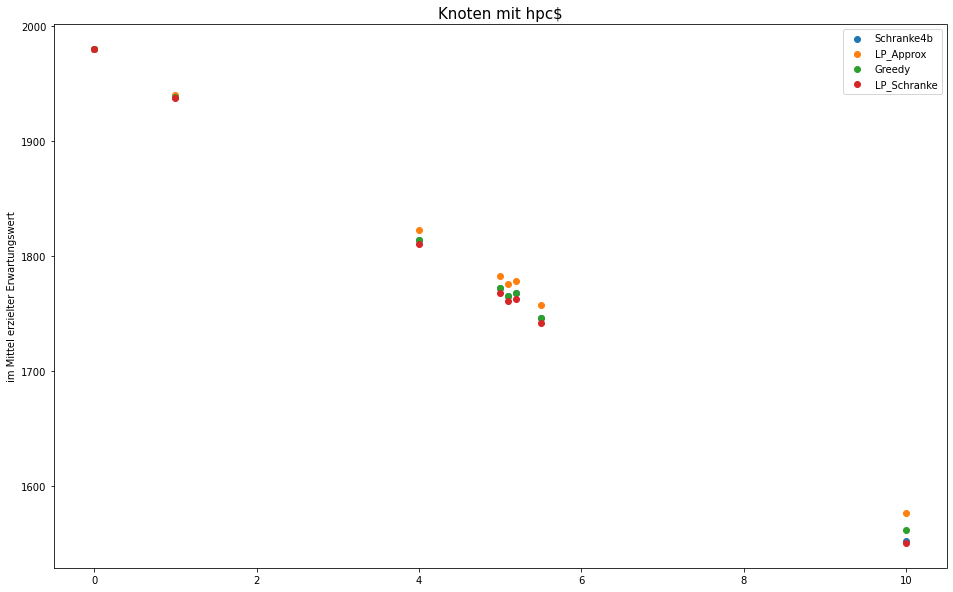

In [5]:
ax = data5[100].plot_results()
# ax.set_ylim([1730,1780])

In [6]:
print(data5[40].m_res['Schranke4b']['ms'])
print(data5[40].m_res['Greedy']['ms'])

[780.0, 763.4252104149999, 614.6047301700002, 715.3542280449999, 697.3915392399998, 694.028881115, 695.2868069349995, 691.4459522250005]
[780.0, 763.4252104149999, 618.8412973300004, 715.3542280449999, 697.3915392399998, 694.028881115, 695.2871255499995, 691.4525314650003]


<AxesSubplot:title={'center':'Knoten mit hpc$'}, ylabel='im Mittel erzielter Erwartungswert'>

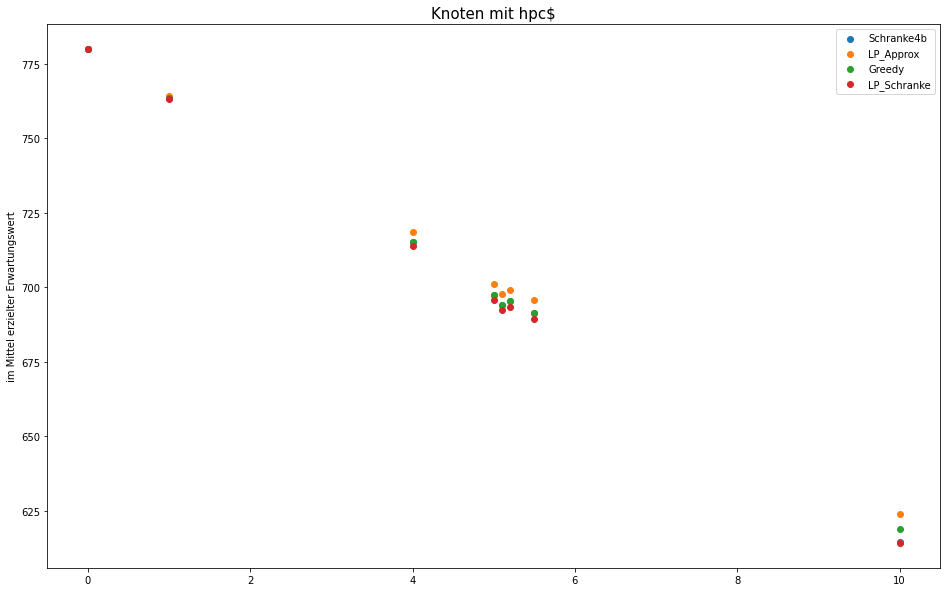

In [7]:
data5[40].plot_results()

Ich untersuche jetzt den greedy-Alg nd vergleiche ihn mit der Schranke4b

In [24]:
print(data5[5120].m_res['Schranke4b']['ms'])
print(data5[5120].m_res['Greedy']['ms'])

[91423.16100171492, 91205.95033816993, 90995.83834374497, 90318.78218032498]
[91423.16100171492, 91205.95399353493, 90995.87798112, 90319.44349702]


In [13]:
print(data5[1280].check_alg_vs_schranke4b('Greedy', alpha)[:-1])
print(data5[640].check_alg_vs_schranke4b('Greedy', alpha)[:-1])
print(data5[5120].check_alg_vs_schranke4b('Greedy', alpha)[:-1])

([0.0, 4.0, 5.0, 5.1, 5.2, 5.5, 10.0], [1.0, 1.0, 1.0, 1.0, 1.0, 0.72, 0.0])
([0.0, 4.0, 5.0, 5.1, 5.2, 5.5, 10.0], [1.0, 1.0, 1.0, 1.0, 0.995, 0.765, 0.0])
([5.0, 5.1, 5.2, 5.5], [1.0, 1.0, 1.0, 0.81])


In [32]:
sorted(data5.keys()).reverse()

(0.6, 1.02)

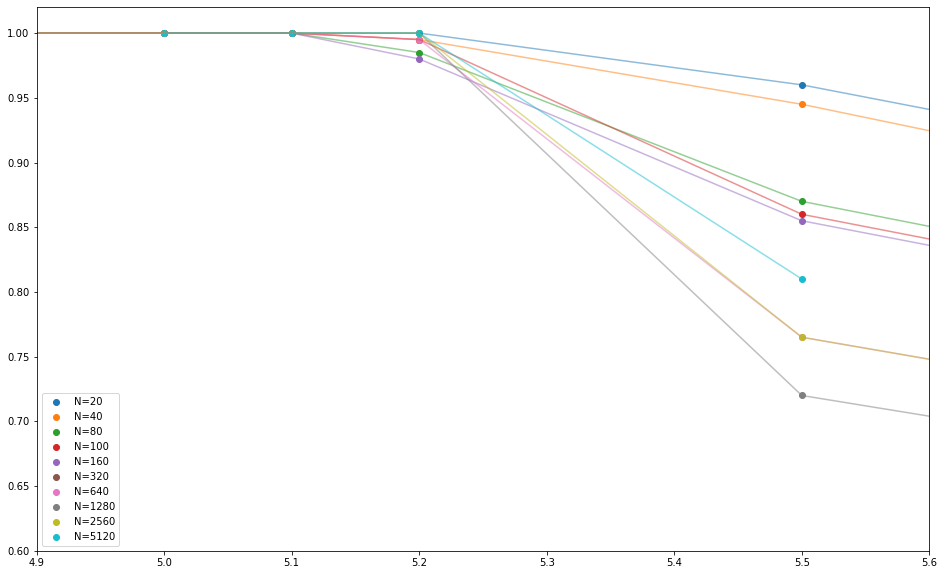

In [12]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.00001
alg='Greedy'

ns = sorted(data5.keys())
# ns.reverse()
for n in ns[1:]:
    
#     b_beide, anteile, _ = data5[n].check_alg_vs_schranke4b(alg, alpha)
    
#     sorted_anteile = 
#     b_beide = sorted()
    
    ax.scatter(*(data5[n].check_alg_vs_schranke4b(alg, alpha)[:-1]), label=f'N={n}')
    ax.plot(*data5[n].check_alg_vs_schranke4b(alg, alpha)[:-1], alpha=0.5)

ax.legend()
ax.set_xlim([4.9,5.6])
ax.set_ylim([0.6, 1.02])

Brauche mehr daten

In [11]:
sorted(data5[10].id_values)

[0.0, 1.0, 4.0, 5.0, 5.1, 5.2, 5.5, 10.0]

Bis b_beide=5.1 erreicht der Greedy-Alg hier immer die Schranke4b und danach fällt das ab. Für größere Problemstellungen schneller aber das erkläre ich mir dadurch, dass es dort mehr Kanten gibt, bei denen die 2. stage Kosten die 1. stage Kosten überschreiten.

Wie sieht das für größere Systeme aus? gibt es da einen Wert nach 5, wo das noch der Fall ist? Wenn ja, lässt sich das mit der Wahrscheinlichkeit dafür erklären, dass es noch genügend Kanten gibt, die in der ersten Phase billiger sind und für einen vollständigen Tree in der ersten Phase reichen?

Im mittel kommt der greedy-Alg hier sehr nah an die Schranke4b ran. Ich denke, dass das auch daran liegt, dass ich so viele Kanten habe

Hab ich hier meinen ersten kleine Phasenübergang? Meine Runs lassen für n=1280 bei 5.2 den Anteil auf 1, während er für fast alle anderen unter 1 rutscht (außer für 20). Vllt. nur Zufall, da muss ich mehr Runs laufen lassen

# checke, ob bei n=5120 der greedy alg immer alle 5119 Kanten in der ersten Phase kauft:

In [20]:
p = r"D:\Uni\Masterarbeit\Daten\ZIC\5_scenarios\ZIC_5120_nodes_5_scenarios\TreePlusC_4.000000_c_5120_nodes_5_RandomScenarioCreator_ZweiIntervallCreator_20.00_30.00_5.20_5.20\simulation_0\Greedy"

In [23]:
for f in os.listdir(p):
#     if auswertung_ma.read_lp_results(os.path.join(p, f))[:,3].sum() != 5119:
    print(auswertung_ma.read_lp_results(os.path.join(p, f))[:,3].sum())

5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0
5119.0

Alle sind 5119! Der Greedy-Alg findet also immer ausreichend Kanten die in der ersten Phase billiger sind als ihr EV der 2. Phase und aus denen sich bereits ein fertiger Tree konstruieren laesst. Das kann man denke ich schon mit der Problemformulierung erklären: Dadurch, dass es so viele Kanten gibt und sich die intervalle noch kaum überlappen, ist die Wahrscheinlichkeit hoch, dass es ausreichend Kanten gibt, die in der 1. stage billiger als ihr EV sind und mit denen sich ein Tree konstruieren lässt. 

Mit Alex bereden